In [59]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## Part 1: Quaternary Record

In [60]:
# Read the text file into a pandas DataFrame
df_miller = pd.read_csv('raw/MillerSeaLevel_Last1ma.txt', sep='\s+', names=['time', 'estimateSL'])

In [61]:
df_miller

,time,estimateSL
0,0.0,-1.6
1,5000.0,-3.3
2,10000.0,-52.4
3,15000.0,-120.4
4,20000.0,-122.2
...,...,...
196,980000.0,-42.6
197,985000.0,-46.6
198,990000.0,-29.3
199,995000.0,-48.1


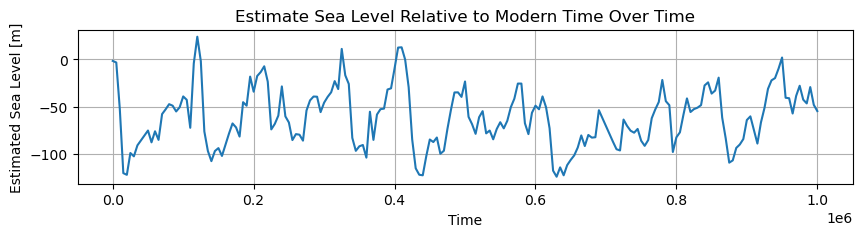

In [62]:
plt.figure(figsize=(10, 2))
plt.plot(df_miller['time'], df_miller['estimateSL'])
plt.xlabel('Time')
plt.ylabel('Estimated Sea Level [m]')
plt.title('Estimate Sea Level Relative to Modern Time Over Time')
plt.grid(True)
plt.show()

In [63]:
data_range = df_miller[(df_miller['time'] >= 380000) & (df_miller['time'] <= 420000)]
data_range['estimateSL'].max()

12.8

There are a couple of peaks with the estimated relative rise record and for the MIS 11, from the data it is estimated to be around 12.8 meter relative to modern sea level.

In [64]:
mis11_data = df_miller[(df_miller['time'] >= 380000) & (df_miller['time'] <= 420000)]
peak_sea_level = mis11_data['estimateSL'].max()
peak_time = mis11_data[mis11_data['estimateSL'] == peak_sea_level]['time'].values[0]
print(f"The peak sea level elevation during MIS 11 is {peak_sea_level} meters, which occurred around {peak_time} years ago.")

The peak sea level elevation during MIS 11 is 12.8 meters, which occurred around 410000.0 years ago.


Downtown Gainesville, Pensacola Airport, and Walt Disney World located inland and not too close to water way and the elevation ranging between 20 to 50 meters putting them in safe spot of the rise of 12.8 meters. While near river areas or channels from Tampa and Jacksonville, they are unfortunately would be too low to be above the 12.8 marks, they would be under water if we still consider the sea level senario to be eustatic change, plate movement in vertical would be different if we look far back during that time so it might be all underwater, or above.

## Part 2: Recent Record

In [65]:
df_topex = pd.read_csv('raw/TopexSeaLevel_1992to2023.txt', sep='\s+', names=['time', 'MSL [mm]'])

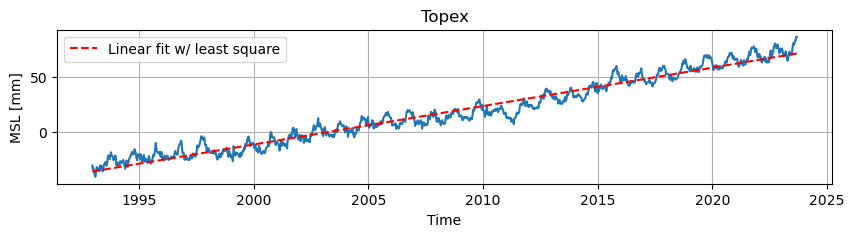

In [66]:
plt.figure(figsize=(10, 2))
plt.plot(df_topex['time'], df_topex['MSL [mm]'])
plt.xlabel('Time')
plt.ylabel('MSL [mm]')
plt.title('Topex')
plt.grid('True')

A = np.vstack([df_topex['time'], np.ones(len(df_topex['time']))]).T 
# because the function require a 2D array for X so stacking and transpose is needed https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html
b, c = np.linalg.lstsq(A, df_topex['MSL [mm]'], rcond=None)[0] # return the mean b and the intersection point c
plt.plot(df_topex['time'], b * df_topex['time'] + c, 'r', label='Linear fit w/ least square', linestyle='--')
plt.legend()
plt.show()

In [67]:
print(f"The mean rate of sea level rise over the past 31 years is {b:.2f} mm/year.")

The mean rate of sea level rise over the past 31 years is 3.45 mm/year.


In [68]:
df_topex_horizontal = df_topex['MSL [mm]'] - (b*df_topex['time'] + c)

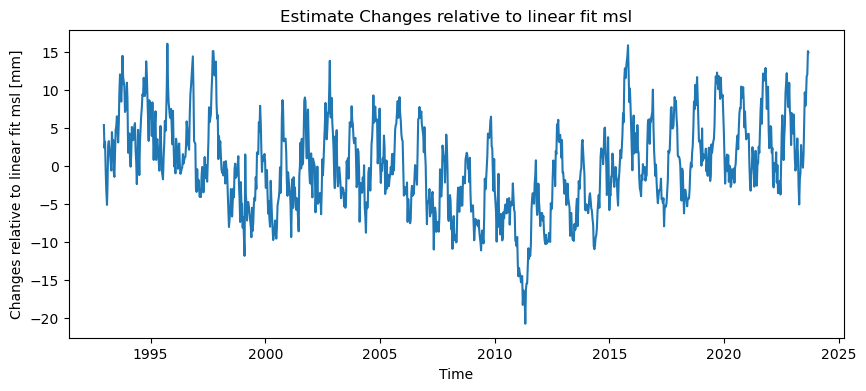

In [69]:
plt.figure(figsize=(10, 4))
plt.plot(df_topex['time'], df_topex_horizontal)
plt.xlabel('Time')
plt.ylabel('Changes relative to linear fit msl [mm]')
plt.title('Estimate Changes relative to linear fit msl')
plt.show()

In [70]:
amplitude_variation = df_topex_horizontal.max() - df_topex_horizontal.min()
print(f"The amplitude variation in df_topex_horizontal is {amplitude_variation:.2f} mm.")

The amplitude variation in df_topex_horizontal is 36.85 mm.


The number founded from simple subtraction between the maximum values and minimum values of the last 31 years are just a simple estimate and it does not account for the different rates within those 31 years. If we account for that using a poly fit equation would better fit the data in smaller time scale and provide a small amplitude variation (Veng et al 2021)
The fluctuation without doing any Fourier analysis we can easily observe the big cycle swing this could come from the decadal changes 2-7 years of the ENSO and the thermal expansion from those events, and tiny swing could be from climate processes and tidal.

## Part 3: Steric Component

In [71]:
data = {
    'Temp (C)': [30, 10, 1],
    'deltaT': [1, 3, 4],
    'alpha': [0.00034, 0.00017, 0.00008],
    'D': [100, 400, 1000]
}
df_temp = pd.DataFrame(data)
df_temp

,Temp (C),deltaT,alpha,D
0,30,1,0.00034,100
1,10,3,0.00017,400
2,1,4,0.00008,1000


In [72]:
df_temp['deltah'] = df_temp['Temp (C)'] * df_temp['deltaT'] * df_temp['alpha'] * df_temp['D']
df_temp

,Temp (C),deltaT,alpha,D,deltah
0,30,1,0.00034,100,1.02
1,10,3,0.00017,400,2.04
2,1,4,0.00008,1000,0.32


Instead of manually do the equation mutiplication, I have compiled a table where the last column deltah (Delta h) is the result of the sea level rise from thermal expansion following these regions: tropic, mid-atlantic, and polar. Mid-atlantic region is affected the most from the steric component and the polar is affected the least. 

With the next 100 years to explain the different in coefficients between 3 regions we have to come back to the Global Distribution of Mixed Layer Depths graph because it explain the melt of fresh water mix with the salty sea water this will affect the coefficients that are used above, the saltier the sea the harder it is to expanse as it shifts the natural chemistry to expanse, and following the behavior of thermal expansion table inside the appendix we can quickly see the relationship compare between fresh and sea water. Polar region with higher melt from the fresh water glacier would have a smaller coefficient number while the tropic only rely on the circulation and water movement from the pole down to the tropic. The mid-atlantic has an in-between coefficients but it result in a higher change in height due to the ocean basin D.